In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy.integrate import cumtrapz

In [3]:
import h5py

# Read in files

In [4]:
d1 = h5py.File('output_files/minimal/CF21_0071.h5', 'r')
d2 = h5py.File('output_files/complete/CF21_0071.h5', 'r')

# Explore files

### File content

In [5]:
# Print content of minimal data file
for key in d1.keys():
    print(key)

metadata
psi4-data


In [6]:
# Print content of complete data file
for key in d2.keys():
    print(key)

horizon-data
metadata
moving-puncture-data
psi4-data
radiated-energy
radiated-linear-momenta


### Inspect metadata

In [7]:
key_list = []
for key in d2['metadata'].attrs.keys():
    key_list.append(key)

print(sorted(key_list))

['LN-relaxed', 'Mf', 'N', 'Norb', 'Omega', 'S1-initial', 'S2-initial', 'chi1-relaxed', 'chi2-relaxed', 'chif', 'd0', 'eccentricity', 'extraction-radii', 'initial-adm-energy', 'mass1-initial', 'mass1-relaxed', 'mass2-initial', 'mass2-relaxed', 'max-levels-1', 'max-levels-2', 'mean-anomaly', 'name', 'object-1', 'object-2', 'p1-initial', 'p1-relaxed', 'p2-initial', 'p2-relaxed', 'r1-initial', 'r1-relaxed', 'r2-initial', 'r2-relaxed', 'simulation-ID', 'tM', 'tR', 'vR']


In [8]:
for item in d2['metadata'].attrs.items():
    print(item)

('LN-relaxed', array([-0.06682771,  0.00299804,  0.25686004]))
('Mf', 0.9829299142218414)
('N', array([144., 144., 144., 144., 144., 192., 288., 384.,  96.,  96.,  96.,
        96.,  96.,  96.,  96.,  96.]))
('Norb', 14.290928730275146)
('Omega', 0.030742105659685864)
('S1-initial', array([0., 0., 0.]))
('S2-initial', array([-0.12185 ,  0.238677,  0.391065]))
('chi1-relaxed', array([ 5.70764377e-05, -1.65776779e-05, -2.88771508e-04]))
('chi2-relaxed', array([-0.17194878,  0.30159435,  0.49015094]))
('chif', array([-0.20362413,  0.21624503,  0.64622824]))
('d0', '75.2')
('eccentricity', 0.002019391396232166)
('extraction-radii', array([ 50.,  60.,  70.,  80.,  90., 100., 120., 180.]))
('initial-adm-energy', 0.9956)
('mass1-initial', 0.111111)
('mass1-relaxed', 0.11111742603949348)
('mass2-initial', 0.888895)
('mass2-relaxed', 0.8884417419375644)
('max-levels-1', '15')
('max-levels-2', '12')
('mean-anomaly', 0.0)
('name', 'q8_A06T30')
('object-1', 'BH')
('object-2', 'BH')
('p1-initial', 

### Extract and plot waveform data

In [9]:
t    = np.array(d1['psi4-data']['extraction-radius-90M']['(2,2)']['t'])
Re22 = np.array(d1['psi4-data']['extraction-radius-90M']['(2,2)']['Re(psi4lm)'])
Im22 = np.array(d1['psi4-data']['extraction-radius-90M']['(2,2)']['Im(psi4lm)'])

In [10]:
extraction_radius = d1['metadata'].attrs.get('extraction-radii')

In [11]:
tortoise_radius = extraction_radius + 2*np.log(extraction_radius/2 - 1)

In [12]:
merger_time = d1['metadata'].attrs.get('tM') + tortoise_radius

In [13]:
relaxed_time = d1['metadata'].attrs.get('tR') + tortoise_radius

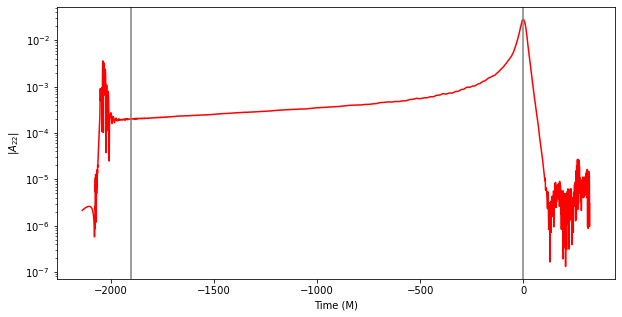

In [14]:
plt.figure(figsize=(10,5))
plt.semilogy( t-merger_time, np.abs(Re22 + 1j*Im22), 'r-' )
plt.axvline(relaxed_time-merger_time, c='grey')
plt.axvline(0., c='grey')
plt.xlabel( 'Time (M)' )
plt.ylabel( '$|A_{22}|$' )
plt.show()

### Extract and plot horizon data

In [15]:
# View available data
for key in d2['horizon-data']['BH1'].keys():
    print(key)

mass
position
spin
t


In [16]:
# Extract spin on smaller black hole
t1 = np.array(d2['horizon-data']['BH1']['t'])
S1 = np.array(d2['horizon-data']['BH1']['spin'])

In [17]:
# Extract spin on larger black hole
t2 = np.array(d2['horizon-data']['BH2']['t'])
S2 = np.array(d2['horizon-data']['BH2']['spin'])

In [18]:
retarded_merger_time = d2['metadata'].attrs.get('tM')

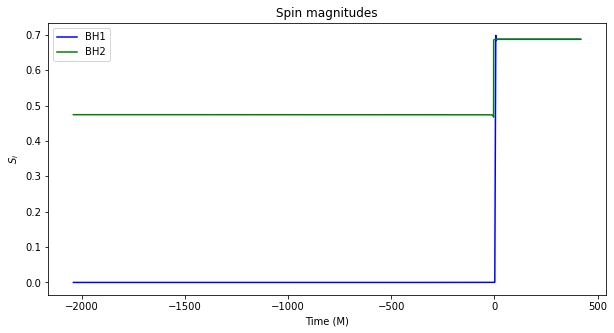

In [19]:
plt.figure(figsize=(10,5))
plt.plot( t1-retarded_merger_time, np.linalg.norm(S1, axis=1), 'b-', label='BH1' )
plt.plot( t2-retarded_merger_time, np.linalg.norm(S2, axis=1), 'g-', label='BH2' )
plt.xlabel( 'Time (M)' )
plt.ylabel( '$S_i$' )
plt.legend( loc='best' )
plt.title( 'Spin magnitudes' )
plt.show()

### Extract and plot moving puncture data

In [20]:
# Extract black holes positions
r1 = d2['moving-puncture-data']['BH1']['position']
r2 = d2['moving-puncture-data']['BH2']['position']

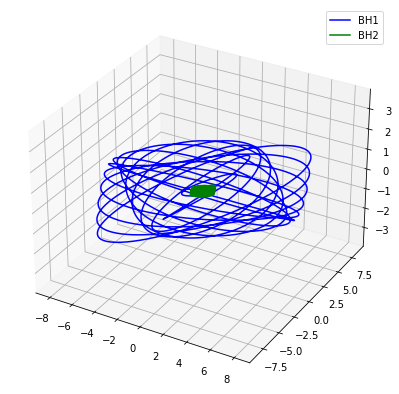

In [21]:
ax = plt.figure(figsize=(7,7)).add_subplot(projection='3d')
ax.plot(r1[0], r1[1], r1[2], 'b-', label='BH1' )
ax.plot(r2[0], r2[1], r2[2], 'g-', label='BH2' )
plt.legend(loc='best')
plt.show()

### Extract and plot radiated quantities

In [22]:
# Time derivate of radiated energy
t    = d2['radiated-energy']['extraction-radius-90M']['t']
dEdt = d2['radiated-energy']['extraction-radius-90M']['dEdt']

In [23]:
# Integrate up to get energy
E = cumtrapz( dEdt, t, initial=0 )

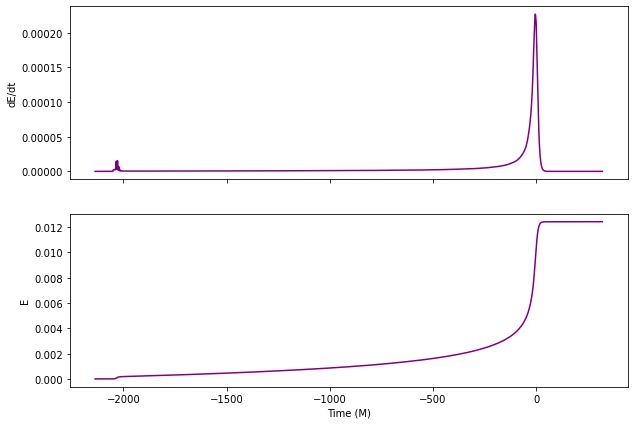

In [24]:
fig, (ax1, ax2) = plt.subplots( 2, 1, figsize=(10,7), sharex=True )
ax1.plot( t - merger_time, dEdt, c='purple')
ax2.plot( t - merger_time, E, c='purple')
ax1.set_ylabel( 'dE/dt' )
ax2.set_xlabel( 'Time (M)' )
ax2.set_ylabel( 'E' )
plt.show()